In [2]:
#pytorch neural network
    #Details
        #Loss Function - Binary cross Entropy
        #3 Hidden Layers with ReLu activations
        #Sigmoid activation for output layer - binary classification


    #import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd


In [3]:
#import our data
column_names = [
    "ID", "Diagnosis", 
    "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness",
    "Mean Compactness", "Mean Concavity", "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension",
    "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE",
    "Compactness SE", "Concavity SE", "Concave Points SE", "Symmetry SE", "Fractal Dimension SE",
    "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness",
    "Worst Compactness", "Worst Concavity", "Worst Concave Points", "Worst Symmetry", "Worst Fractal Dimension"
]

data = pd.read_csv('../data/wdbc.data')
n_feat = 30
data.columns = column_names

data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})  # Convert M to 1, B to 0

df_numeric = data.drop(columns=['ID'], errors='ignore')
x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

total_samples = len(x)
train_size = int(total_samples * 0.8)
val_size = int(total_samples * 0.1)


X_train = x[:train_size]
y_train = y[:train_size]
X_val = x[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]


X_test = x[train_size+val_size:]
y_test = y[train_size+val_size:]

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val).unsqueeze(1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)



In [4]:
# Define a simple neural network using PyTorch's nn.Module
class SimpleNN(nn.Module): #inherit from nn Module
    def __init__(self):
        # Call the __init__ method of the base class nn.Module
        super(SimpleNN, self).__init__()

        # Define the network structure using nn.Sequential
        # This stacks layers together in the order they are written
        self.net = nn.Sequential(
            # First layer: Fully connected (Linear) layer
            # Maps input of size "n_feat" (which is 3 features in this dataset) to 4 hidden neurons
            nn.Linear(n_feat, 15),

            nn.ReLU(),

            nn.Linear(15,10),

            nn.ReLU(),
 
            nn.Linear(10, 5),

            nn.ReLU(),

            # Last layer: 
            nn.Linear(5, 1),
            nn.Sigmoid()
        )

    # Forward method defines how data passes through the model
    def forward(self, x):
        # Pass input x through the defined object "net" (the layers above)
        return self.net(x)


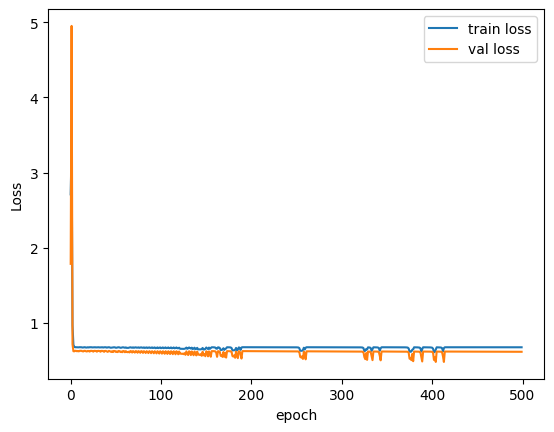

Test Accuracy: 0.7586


In [8]:
#Train / Run our Neural Network

model = SimpleNN()

loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=.01) 


loss_train = []
loss_val = []

for epoch in range(500):
    #zero out our grandients for this pass
    optimizer.zero_grad()
    # predict on train data
    output = model(X_train)
    # compute train loss
    loss = loss_function(output, y_train)
    loss_train.append(loss.item())
    # predict and compute loss on val data
    with torch.no_grad(): # No need to compute gradients for validation data
        out_val = loss_function(model(X_val), y_val)
        loss_val.append(out_val)
        
    # backprop, autodifferentiation
    loss.backward()
    # update weights
    optimizer.step()




# plot loss curves here
plt.plot(loss_train, label="train loss")
plt.plot(loss_val, label="val loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
# Print the learned parameters
# complete me

with torch.no_grad():
    # Get model predictions
    preds = model(X_test)
    # Convert probabilities to binary predictions (0 or 1)
    binary_preds = (preds > 0.5).float()
    # Calculate accuracy
    accuracy = (binary_preds == y_test).float().mean()
    
    print(f"Test Accuracy: {accuracy.item():.4f}")